#### TODOS
- [x] Scale distplots with log axes
- [x] Scale scatterplots with log-log, z-score
- [x] Add new feature that is (pubs with prof) * de-weight / pubs
- [x] Change prof definition to .25
- [x] Add scatterplots for max/min/mean

In [1]:
import pandas as pd

In [2]:
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation.csv', index_col = 'name', encoding = "UTF-8")

In [ ]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d publications" % (df_all[df_all['num_pubs'] < i].shape[0], i))

In [ ]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d coauthorships" % (df_all[df_all['TotalConns'] < i].shape[0], i))

In [3]:
df_trimmed = df_all[df_all['num_pubs'] >= 5]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 3]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193942 authors


In [4]:
df_trimmed = df_trimmed[df_trimmed['max_AR'] < 1000]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193941 authors


In [5]:
df_trimmed = df_trimmed[df_trimmed['InterCommunityFocus'] < 900]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193940 authors


In [ ]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    print(df_not_null[[col]].sort_values(col, ascending = False).head(10))
    print("\nBottom 10 %s" % str(col))
    print(df_not_null[[col]].sort_values(col, ascending = True).head(10))

In [ ]:
interesting_authors = ['Eric S. Lander', 'Robert Langer', 'Marvin Minsky', 'Francis Crick', 'Sydney Brenner', 'Richard Henderson', 'Edward S. Boyden']
df_trimmed.loc[interesting_authors]

In [ ]:
df_percentile = df_trimmed.copy()
for col in df_trimmed.columns:
    percentile_col = df_trimmed[pd.notna(df_trimmed[col])][col]
    df_percentile[col+'_%'] = percentile_col.rank(pct=True)
df_percentile_interesting_authors = df_percentile.loc[interesting_authors][[col for col in df_percentile.columns if '%' in col and 'N' not in col]]
df_percentile_interesting_authors.to_csv('C:\\Users\\Brend\\Downloads\\interesting_authors_percentile.csv', index = True, encoding = "UTF-8")

In [ ]:
df_percentile_interesting_authors

In [12]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'Zscore' in col]]

In [ ]:
df_zcores_interesting_authors = df_zscores.loc[interesting_authors][[col for col in df_zscores.columns if 'Zscore' in col and 'N' not in col]]
df_zcores_interesting_authors.to_csv('C:\\Users\\Brend\\Downloads\\interesting_authors_zscore.csv', index = True, encoding = "UTF-8")
df_zcores_interesting_authors

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [ ]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()

In [ ]:
print(df_zscores.columns)

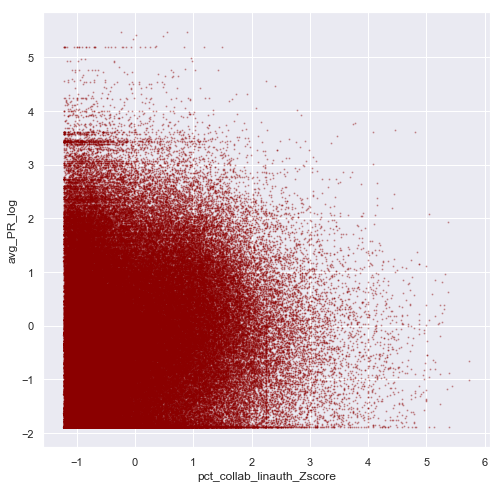

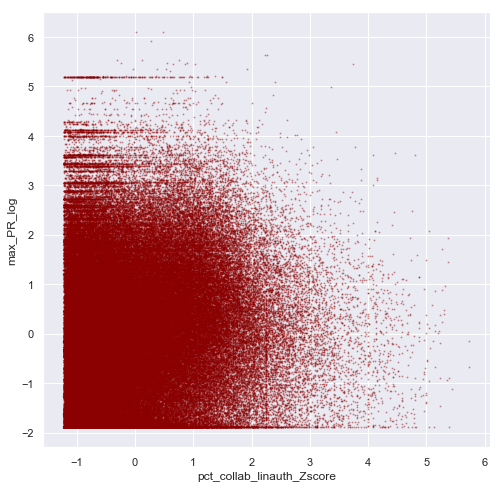

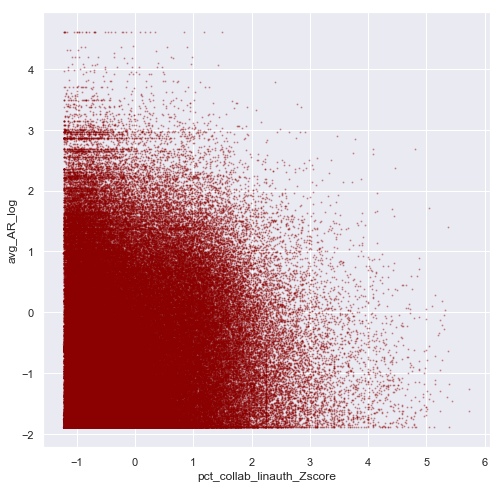

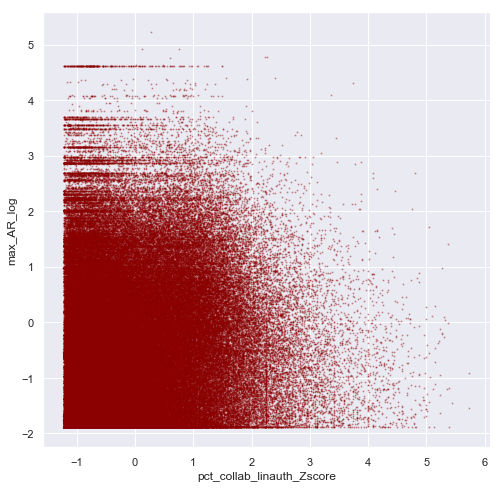

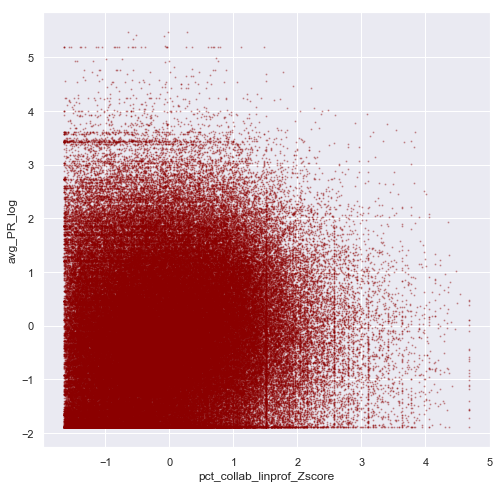

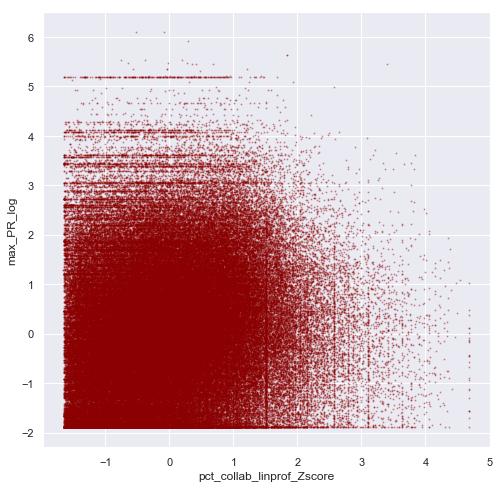

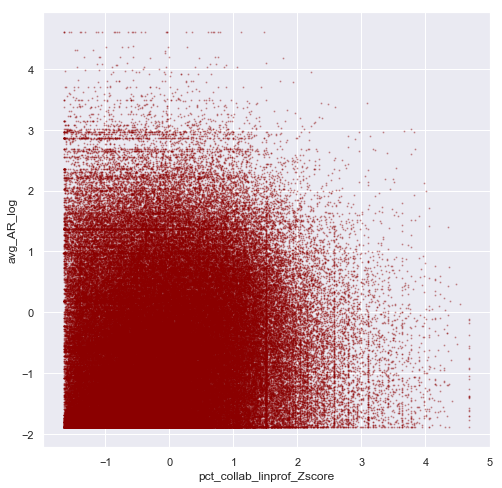

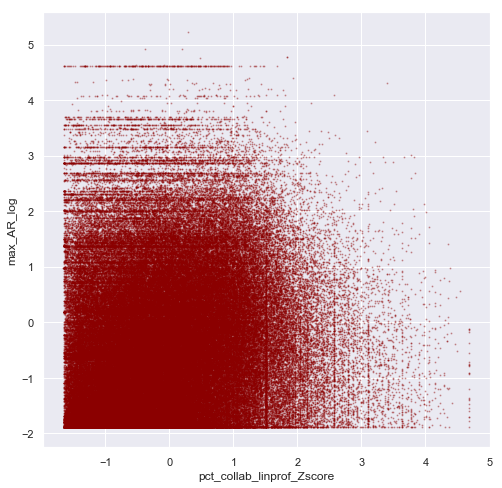

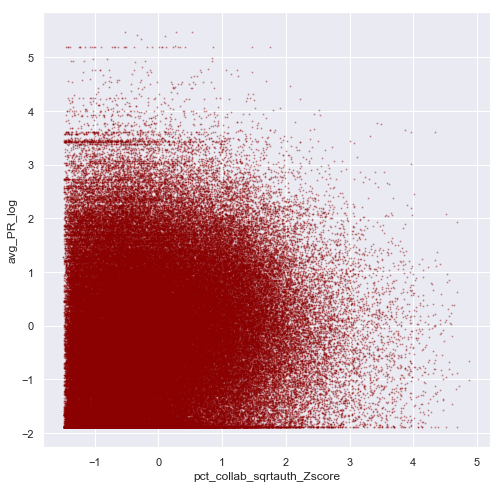

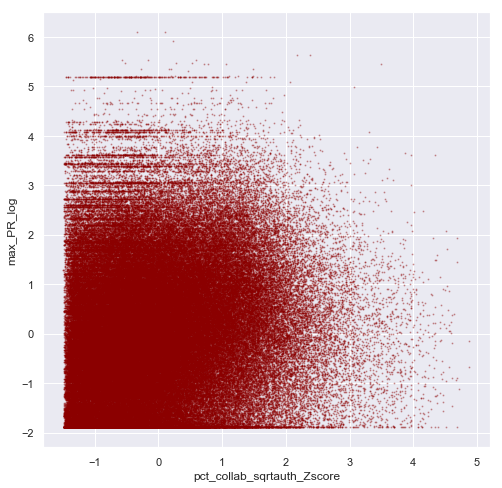

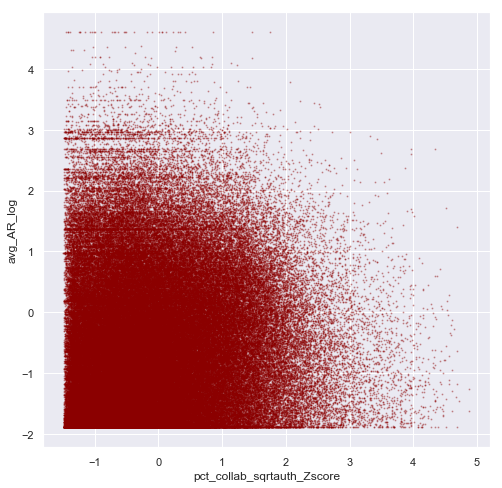

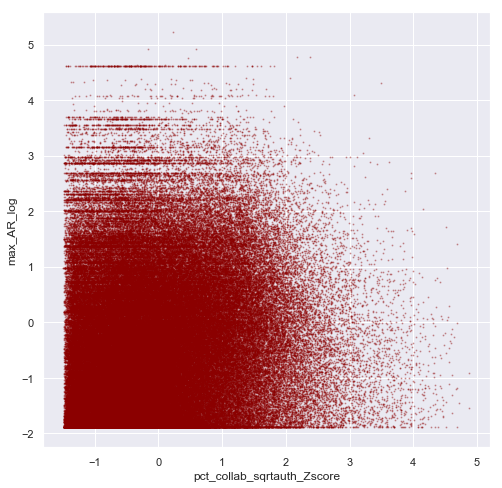

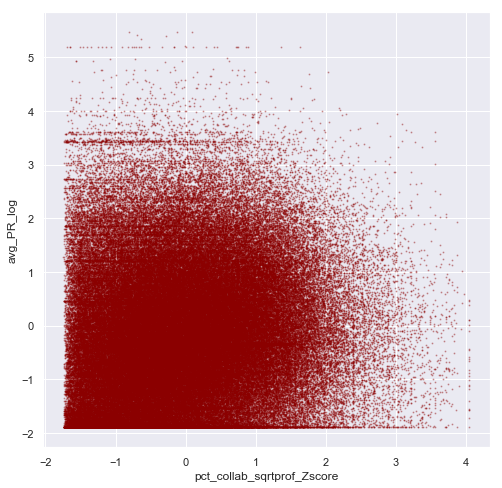

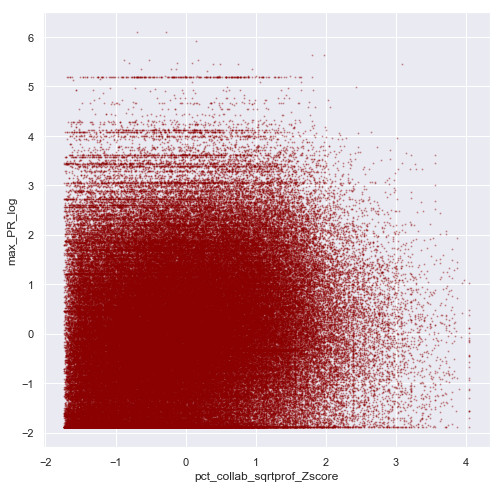

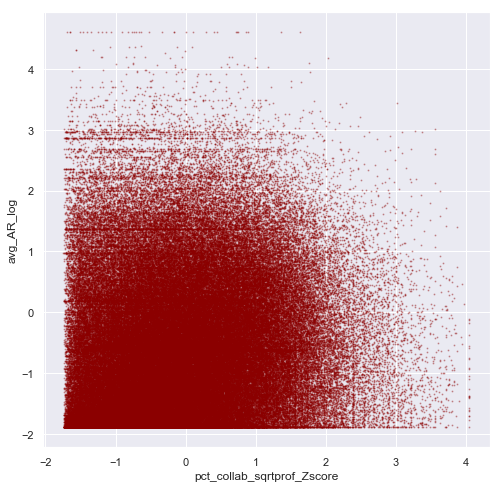

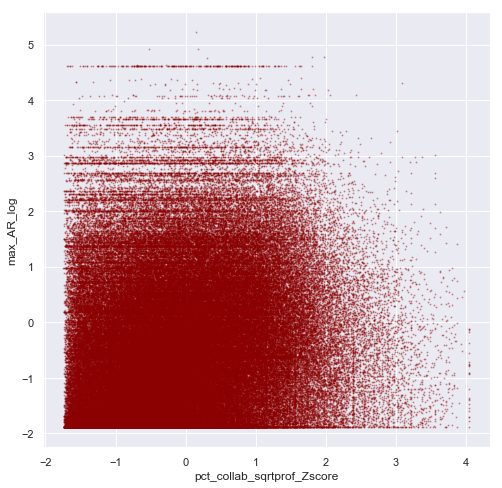

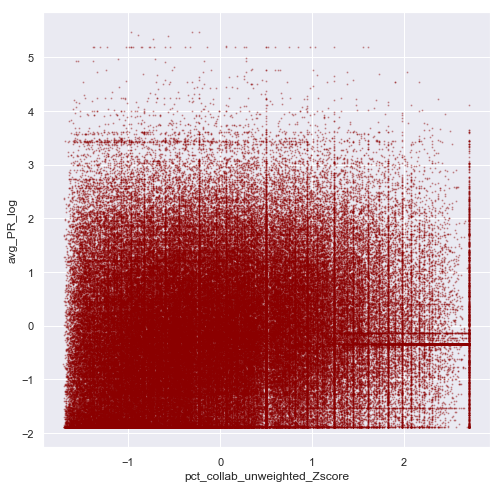

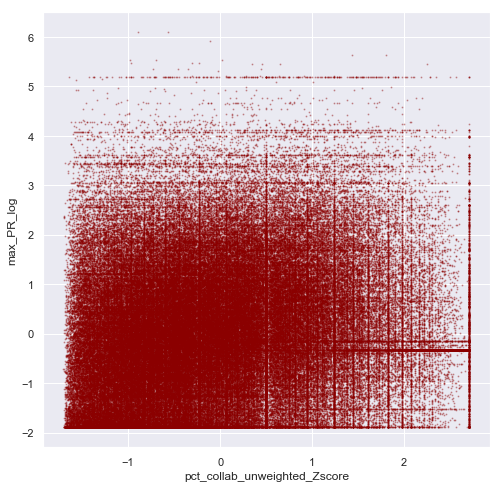

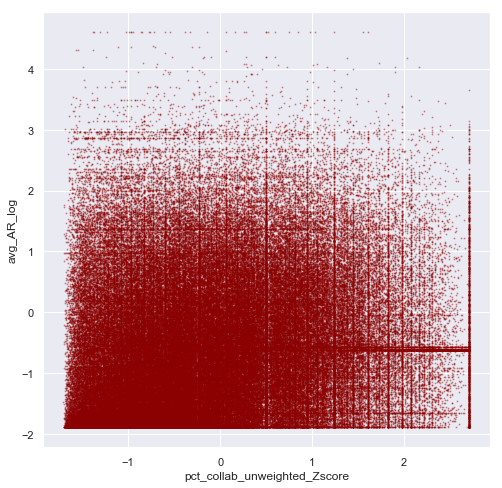

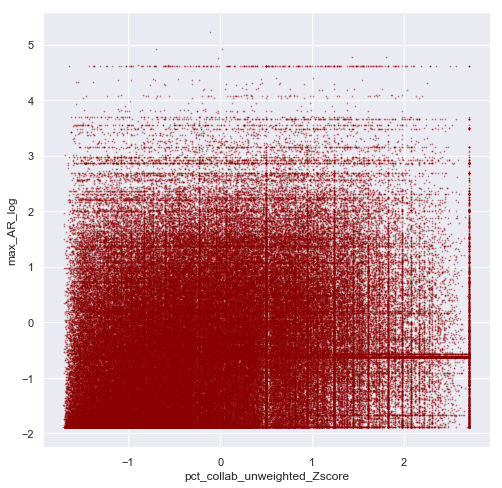

In [13]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore']
impact_columns = ['avg_PR_log', 'max_PR_log', 'avg_AR_log', 'max_AR_log']

for x_col in collab_columns:
    for y_col in impact_columns:
        data = pd.concat([df_zscores[[x_col]], df_log[[y_col]]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col, data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


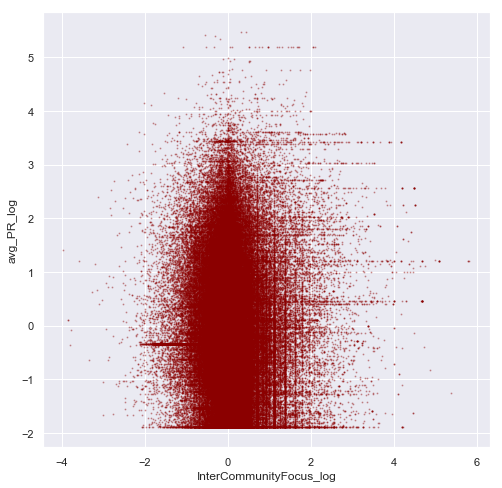

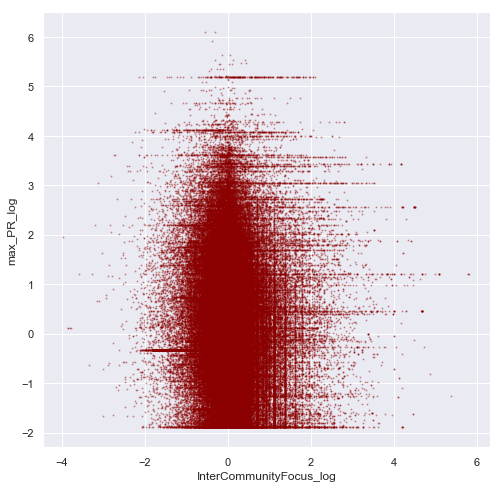

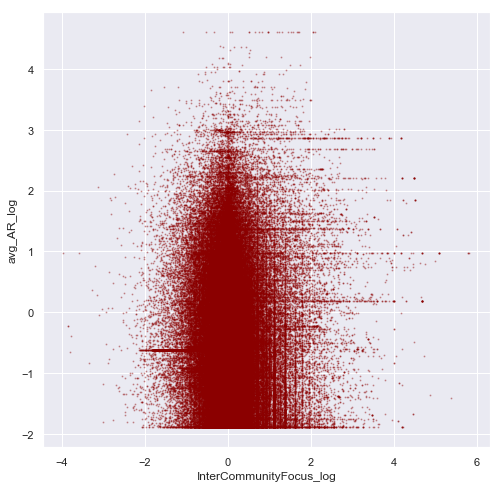

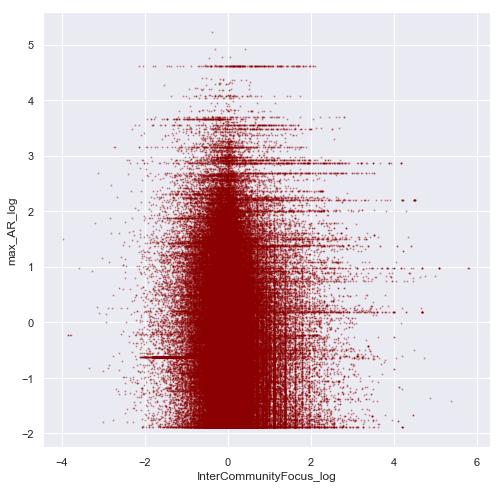

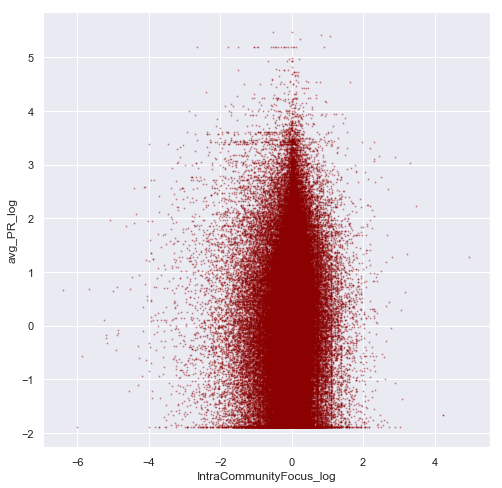

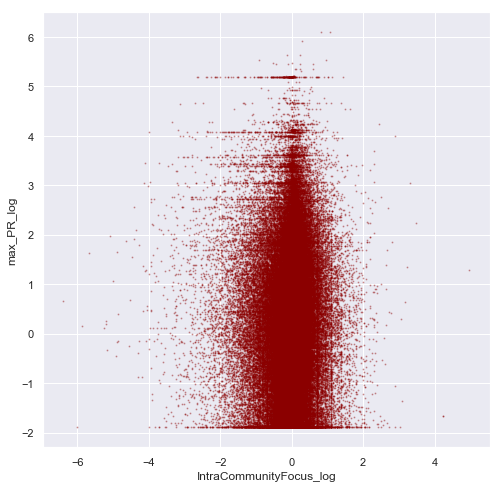

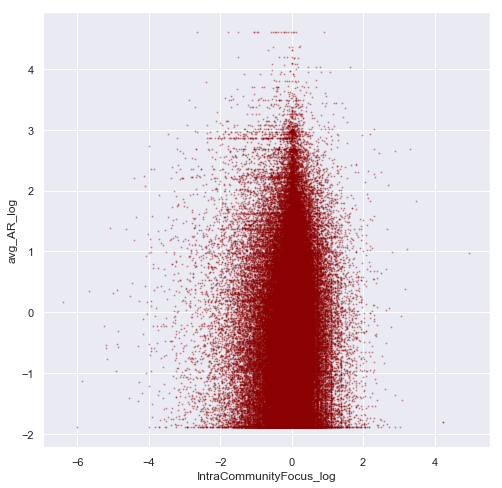

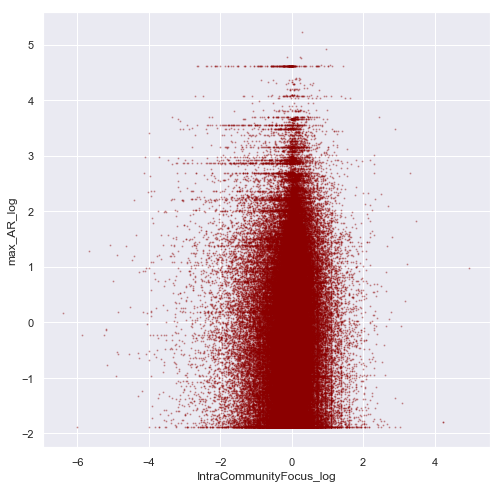

In [9]:
collab_columns = ['InterCommunityFocus_log', 'IntraCommunityFocus_log']
impact_columns = ['avg_PR_log', 'max_PR_log', 'avg_AR_log', 'max_AR_log']

for x_col in collab_columns:
    for y_col in impact_columns:
        data = pd.concat([df_log[[x_col]], df_log[[y_col]]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col, data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [8]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [ ]:
df_log.columns

In [ ]:
df_log.loc['Eric S. Lander']